In [1]:
from BanditAnalysisFunctions import *
from structured_agent import *
sessdf1 = pd.read_csv('sessdf1.csv')

In [2]:
sessdf1.groupby('session#').mean(numeric_only = True).tail(15)

,Unnamed: 0,trial#,trialstart,port,reward,trialend,eptime,task,rewprobfull1,rewprobfull2,rw
session#,,,,,,,,,,,
178,109081.0,109081.0,9.552976e+05,1.570220,0.500846,9.559541e+05,1.701818e+09,12.0,40.0,60.0,51.404399
179,109840.0,109840.0,1.078376e+06,1.500539,0.509169,1.078919e+06,1.701833e+09,12.0,60.0,40.0,49.989213
180,110569.0,110569.0,6.207147e+05,1.917137,0.736347,6.212467e+05,1.701890e+09,12.0,20.0,80.0,75.028249
181,111223.5,111223.5,1.082545e+06,1.069409,0.686375,1.083118e+06,1.701905e+09,12.0,70.0,30.0,67.223650
182,112049.5,112049.5,9.114114e+05,1.381007,0.493135,9.119581e+05,1.701919e+09,12.0,40.0,60.0,47.620137
183,112726.0,112726.0,1.377660e+06,1.014614,0.874739,1.378211e+06,1.701977e+09,12.0,90.0,10.0,88.830898
184,113334.5,113334.5,9.457942e+05,1.055556,0.582656,9.463295e+05,1.701991e+09,12.0,60.0,40.0,58.888889
185,114094.5,114094.5,9.207680e+05,1.975703,0.785166,9.213259e+05,1.702005e+09,12.0,20.0,80.0,78.542199
187,114878.0,114878.0,1.030026e+06,1.931210,0.662420,1.030559e+06,1.702077e+09,12.0,30.0,70.0,67.248408


[30.0, 70.0, 20.0, 10.0, 10.0, 80.0, 40.0, 90.0, 60.0, 20.0, 60.0, 60.0, 70.0, 70.0]


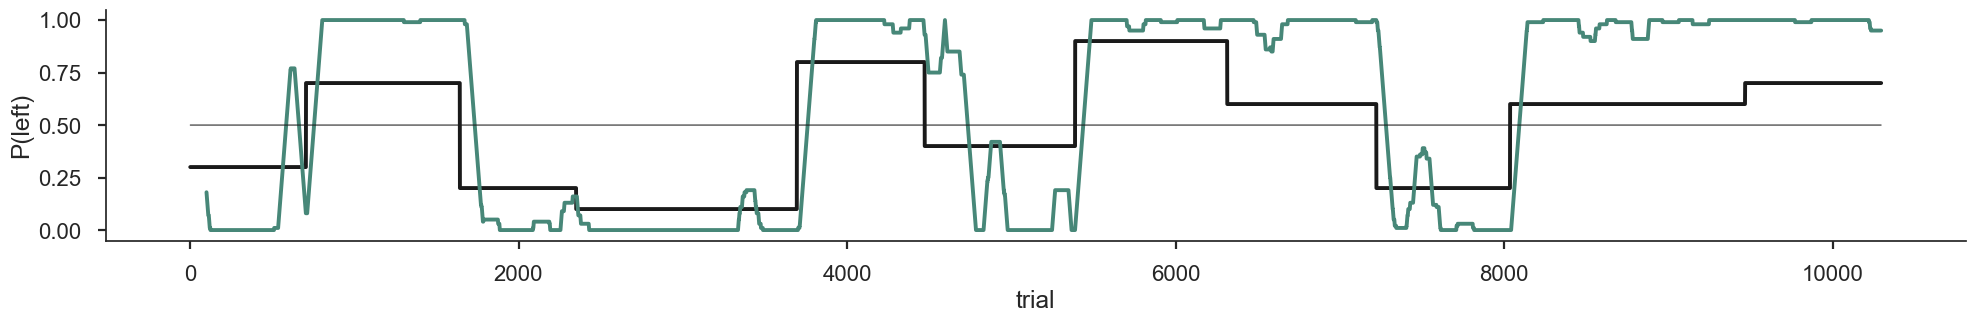

In [69]:
# plot containing: assigned prob of port 1, frequency of choosing port 1, whether each choice was rewarded or not, session boundaries
plt.style.use('seaborn-v0_8-poster')

sessdf1_t = sessdf1[(sessdf1['session#']> 140) & (sessdf1['session#']< 155)] #140 to 155
sessdf1_s = sessdf1_t #[(sessdf1_t['rewprobfull1']==20)|(sessdf1_t['rewprobfull1']==80)]
print(sessdf1_s.groupby('session#').mean(numeric_only = True)['rewprobfull1'].tolist())
assigned = (sessdf1_s['rewprobfull1'][:].tolist())
assigned = assigned/(np.ones(len(assigned))*100)
choices = sessdf1_s['port'][:].tolist()
for index, x in enumerate(choices):
    if choices[index] == 2:
        choices[index] = 0
c_frequency = pd.DataFrame(choices).rolling(100).mean()[0].tolist()
fig, ax = plt.subplots(figsize = (24, 3))
ax.plot(np.arange(1, len(assigned)+1), assigned, 'k')
ax.plot(np.arange(1, len(c_frequency)+1), c_frequency, '#478778')
ax.plot(np.arange(1, len(assigned)+1), np.ones(len(assigned))*0.5, 'k', linewidth = 0.75)
# ax.legend(('left reward assignment probability', 'left choice frequency'), loc = 'upper right')
ax.set_ylabel('P(left)')
ax.set_xlabel('trial')
# ax.set_xticks(np.arange(0, 18000, 1000))
sns.despine()

fig.savefig('choice plot.svg', format='svg', dpi=1200)



Signature:
structured(
    trials,
    sessions,
    probs,
    coupling,
    policy,
    params,
    window,
    output,
    plot,
)
Docstring:
coupling parameter defines degree of structure
store all choices and rewards in separate arrays
params in order: alpha, epsilon, tau
policy: softmax or epsilon-greedy
File:      c:\users\dlab\downloads\autotrainermodular\structured_agent.py
Type:      function

In [66]:
choices, p_left, rewards = structured(670, 10, 'all', 0, 'e-greedy', [0.05, 0.1, 0.05], 10, 'none', False)

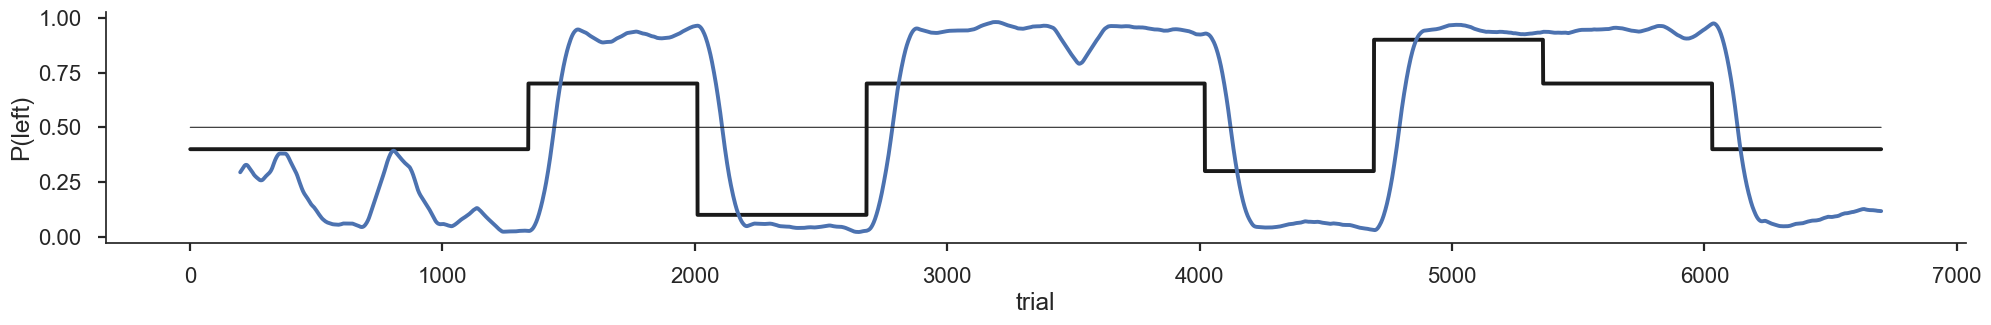

In [68]:
plt.style.use('seaborn-v0_8-poster')

assigned_agent = []
choices = pd.DataFrame(choices).rolling(100).mean()[0].tolist()
for e in p_left:
    for i in range(670):
        assigned_agent.append(e)
        

fix, ax = plt.subplots(figsize = (24,3))
ax.plot(np.arange(1, len(assigned_agent)+1), assigned_agent, 'k')
ax.plot(np.arange(1, len(choices)+1), choices, 'b')
ax.plot(np.arange(1, len(assigned_agent)+1), np.ones(len(assigned_agent))*0.5, 'k', linewidth = 0.75)
ax.set_ylabel('P(left)')
ax.set_xlabel('trial')
sns.despine()
fix.savefig('plot_agent.svg', format='svg', dpi=1200)


In [29]:
unstructured?


Signature:
unstructured(
    trials,
    sessions,
    coupling,
    policy,
    params,
    window,
    output,
    plot,
)
Docstring:
coupling parameter defines degree of structure
store all choices and rewards in separate arrays
params in order: alpha, epsilon, tau
policy: softmax or epsilon-greedy
File:      c:\users\dlab\downloads\autotrainermodular\structured_agent.py
Type:      function

In [2]:
choices_u, p_left_u, rewards_u = unstructured(670, 10, 0, 'e-greedy', [0.05, 0.1, 0.05], 10, 'none', False)

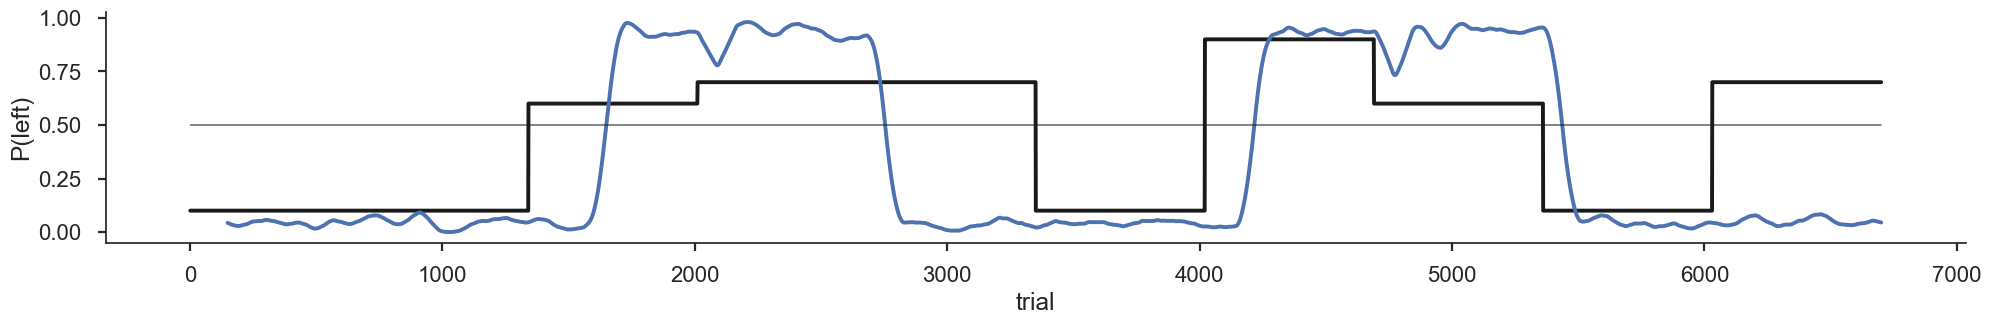

In [4]:
plt.style.use('seaborn-v0_8-poster')

assigned_agent = []
choices_u = pd.DataFrame(choices_u).rolling(75).mean()[0].tolist()
for e in p_left_u:
    for i in range(670):
        assigned_agent.append(e)
        

fig, ax = plt.subplots(figsize = (24,3))
ax.plot(np.arange(1, len(assigned_agent)+1), assigned_agent, 'k')
ax.plot(np.arange(1, len(choices_u)+1), choices_u, 'b')
ax.plot(np.arange(1, len(assigned_agent)+1), np.ones(len(assigned_agent))*0.5, 'k', linewidth = 0.75)
ax.set_ylabel('P(left)')
ax.set_xlabel('trial')
sns.despine()
# fig.savefig('choice plot_agent.svg', format='svg', dpi=1200)
